<a href="https://colab.research.google.com/github/lafa-code/MachineLearning/blob/main/MenanganiOutlier_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
""" akses ke dataset yang disimpan digoogle drive"""
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
""" path dataset"""

#Membaca dataset into a dataframe (data dalam format tabel dua dimensi yang terdiri dari baris dan kolom)
#Library to read and process dataframes
import pandas as pd

#memilih path dataset
file_path = '/content/drive/MyDrive/01-DATASET_FINAL/coba_out.xlsx'


# membaca file excel dalam dataframe df
df = pd.read_excel(file_path)

In [3]:
df

,Nama,Matematika,Bahasa,Fisika,Jenis Kelamin
0,joko,85,80,78,Laki-laki
1,Dina,77,78,79,Perempuan
2,Mira,83,85,74,Perempuan
3,Ana,5,5,2,Perempuan
4,Mipan,80,87,82,Laki-laki
5,Sandi,79,80,80,Laki-laki


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

""" Penanganan outlier """
non_categorical_columns = df.select_dtypes(include=[np.number]).columns


In [5]:
#mengecek fitur mana saja yang termasuk variabel numeric
non_categorical_columns

Index(['Matematika', 'Bahasa', 'Fisika'], dtype='object')

([0, 1, 2],
 [Text(0, 0, 'Matematika'), Text(1, 0, 'Bahasa'), Text(2, 0, 'Fisika')])

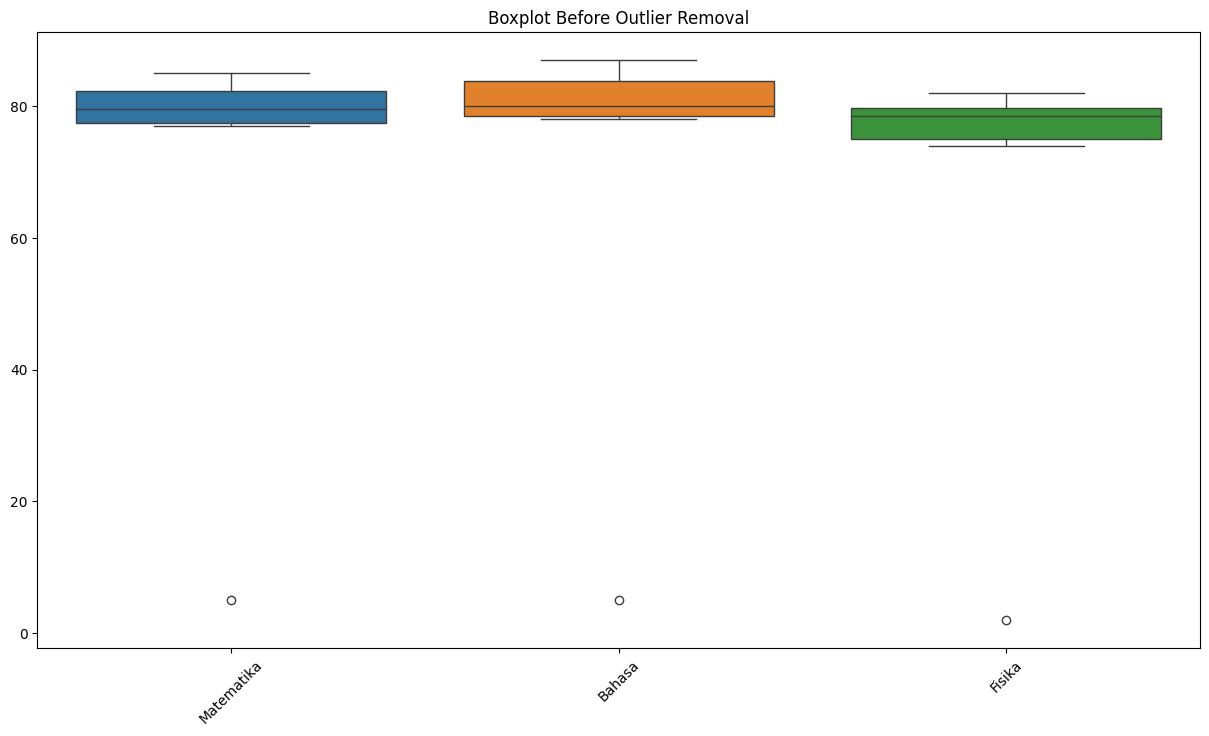

In [6]:
# Visualisasi box plots sebelum penghapusan outlier
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[non_categorical_columns])
plt.title('Boxplot Before Outlier Removal')
plt.xticks(rotation=45)

In [7]:
""" Method 2 - Outliers Removal dengan Inter Quartile Range (IQR)
Fungsi ini menerima dua argumen df(dataset) dan Daftar nama kolom dalam DataFrame """
def remove_outliers_iqr(df, columns):
    # Membuat salinan DataFrame untuk menghindari perubahan langsung pada dataset asli
    df_no_outliers = df.copy()
    # Iterasi melalui setiap kolom yang ingin diperiksa
    for col in columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1

        # definisikan batas bawah dan batas atas IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Terapkan batasan untuk menyaring outlier
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
        # Kembalikan salinan DataFrame yang tidak berisi outlier
    return df_no_outliers

# menyimpan menjadi dataset baru setelah penghapusan outlier
df_iqr_removed = remove_outliers_iqr(df, non_categorical_columns)
df_iqr_removed.to_csv('Data_without_Outliers_IQR.csv', index=False)


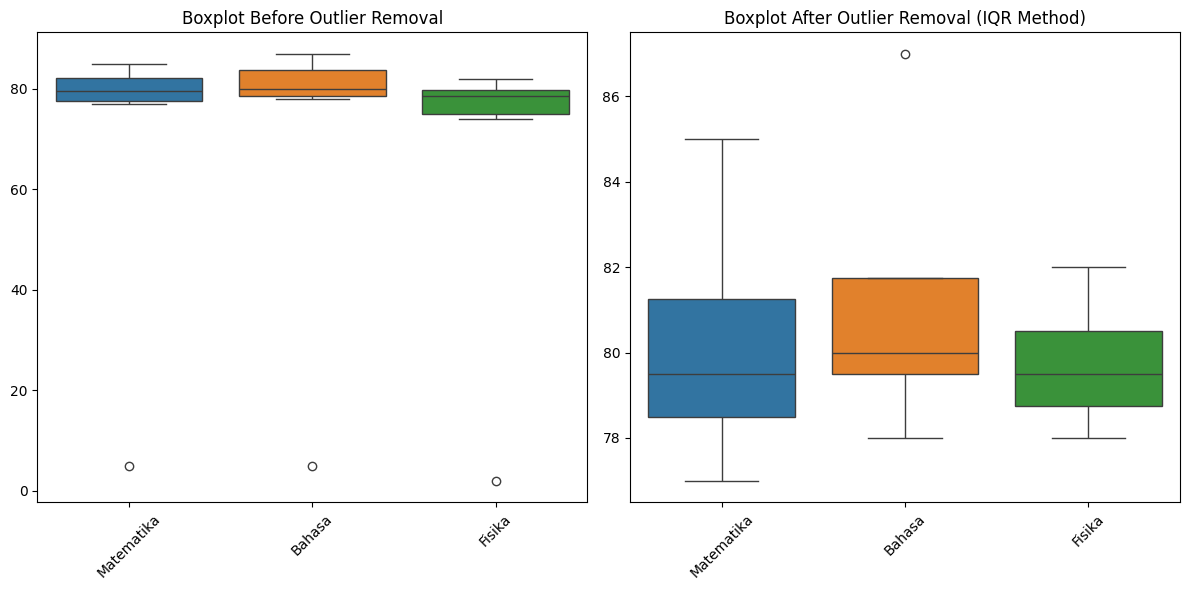

In [8]:
#visualisasi bersebelahan menggunakan matplotlib dan seaborn untuk membuat visualisasi boxplot

# Baris ini mengatur ukuran figure (kanvas) yang akan digunakan untuk menggambar visualisasi.
plt.figure(figsize=(12, 6))

# Boxplot data asli sebelum penghapusan

""" digunakan untuk membuat beberapa plot (grafik) dalam satu figure (kanvas), yang terorganisir dalam bentuk grid.
plt.subplot(nrows, ncols, index)
nrows: Jumlah baris dalam grid.
ncols: Jumlah kolom dalam grid.
index: Posisi dari plot yang akan dibuat, dihitung dari kiri ke kanan, atas ke bawah."""
plt.subplot(1, 2, 1)

# Boxplot dibuat untuk data setelah penghapusan outliers menggunakan metode IQR, yang terdapat dalam DataFrame df_iqr_removed, hanya untuk kolom numerik (non_categorical_columns).
sns.boxplot(data=df[non_categorical_columns])

#memberi judul
plt.title('Boxplot Before Outlier Removal')

# label pada sumbu x dirotasi sebanyak 45 derajat untuk memudahkan pembacaan.
plt.xticks(rotation=45)

# Boxplot setelah penghapusan dengan metode IQR
#plot yang dibuat akan ditempatkan di posisi kedua dari grid yang terdiri dari 1 baris dan 2 kolom
plt.subplot(1, 2, 2)

# Boxplot dibuat untuk data setelah penghapusan outliers menggunakan metode IQR, yang terdapat dalam DataFrame df_iqr_removed, hanya untuk kolom numerik (non_categorical_columns).
sns.boxplot(data=df_iqr_removed[non_categorical_columns])

#memberi judul
plt.title('Boxplot After Outlier Removal (IQR Method)')

# label pada sumbu x dirotasi sebanyak 45 derajat untuk memudahkan pembacaan.
plt.xticks(rotation=45)

#memastikan tata letak dari kedua subplot tidak tumpang tindih dan tampil lebih rapi dengan menyesuaikan ukuran dan ruang di antara plot.
plt.tight_layout()

#Menampilkan kedua boxplot di layar, baik yang sebelum maupun sesudah penghapusan outliers.
plt.show()